In [2]:
import numpy as np 
import pandas as pd
from tf_keras.models import Sequential
from tf_keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score 
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os
for dirname, _, filenames in os.walk('archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


archive\Testing\glioma_tumor\image(1).jpg
archive\Testing\glioma_tumor\image(10).jpg
archive\Testing\glioma_tumor\image(100).jpg
archive\Testing\glioma_tumor\image(11).jpg
archive\Testing\glioma_tumor\image(12).jpg
archive\Testing\glioma_tumor\image(13).jpg
archive\Testing\glioma_tumor\image(14).jpg
archive\Testing\glioma_tumor\image(15).jpg
archive\Testing\glioma_tumor\image(16).jpg
archive\Testing\glioma_tumor\image(17).jpg
archive\Testing\glioma_tumor\image(18).jpg
archive\Testing\glioma_tumor\image(19).jpg
archive\Testing\glioma_tumor\image(2).jpg
archive\Testing\glioma_tumor\image(20).jpg
archive\Testing\glioma_tumor\image(21).jpg
archive\Testing\glioma_tumor\image(22).jpg
archive\Testing\glioma_tumor\image(23).jpg
archive\Testing\glioma_tumor\image(24).jpg
archive\Testing\glioma_tumor\image(25).jpg
archive\Testing\glioma_tumor\image(26).jpg
archive\Testing\glioma_tumor\image(27).jpg
archive\Testing\glioma_tumor\image(28).jpg
archive\Testing\glioma_tumor\image(29).jpg
archive\Tes

In [3]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('archive/Training/',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('archive/Testing/',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [4]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [6]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [7]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30


83/83 [==============================] - 235s 3s/step - loss: 1.9609 - accuracy: 0.2997 - val_loss: 1.3648 - val_accuracy: 0.2789
Epoch 2/30
83/83 [==============================] - 193s 2s/step - loss: 1.1743 - accuracy: 0.4760 - val_loss: 1.1099 - val_accuracy: 0.5102
Epoch 3/30
83/83 [==============================] - 190s 2s/step - loss: 1.0141 - accuracy: 0.5441 - val_loss: 0.9256 - val_accuracy: 0.6020
Epoch 4/30
83/83 [==============================] - 214s 3s/step - loss: 0.9006 - accuracy: 0.6209 - val_loss: 0.9444 - val_accuracy: 0.5884
Epoch 5/30
83/83 [==============================] - 197s 2s/step - loss: 0.8003 - accuracy: 0.6489 - val_loss: 0.7910 - val_accuracy: 0.6531
Epoch 6/30
83/83 [==============================] - 144s 2s/step - loss: 0.7056 - accuracy: 0.7045 - val_loss: 0.6958 - val_accuracy: 0.7075
Epoch 7/30
83/83 [==============================] - 150s 2s/step - loss: 0.5870 - accuracy: 0.7616 - val_loss: 0.6511 - val_accuracy: 0.7279
Epoch 8/30


In [11]:
model.save('braintumor.h5')

c:\Users\bhowm\AppData\Local\Programs\Python\Python312\Lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

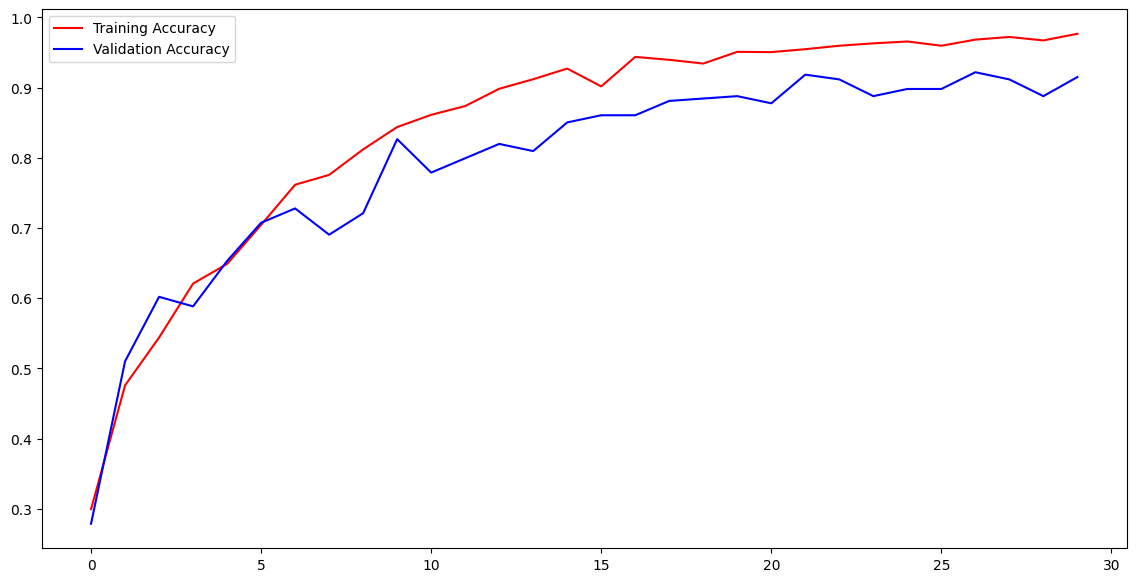

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

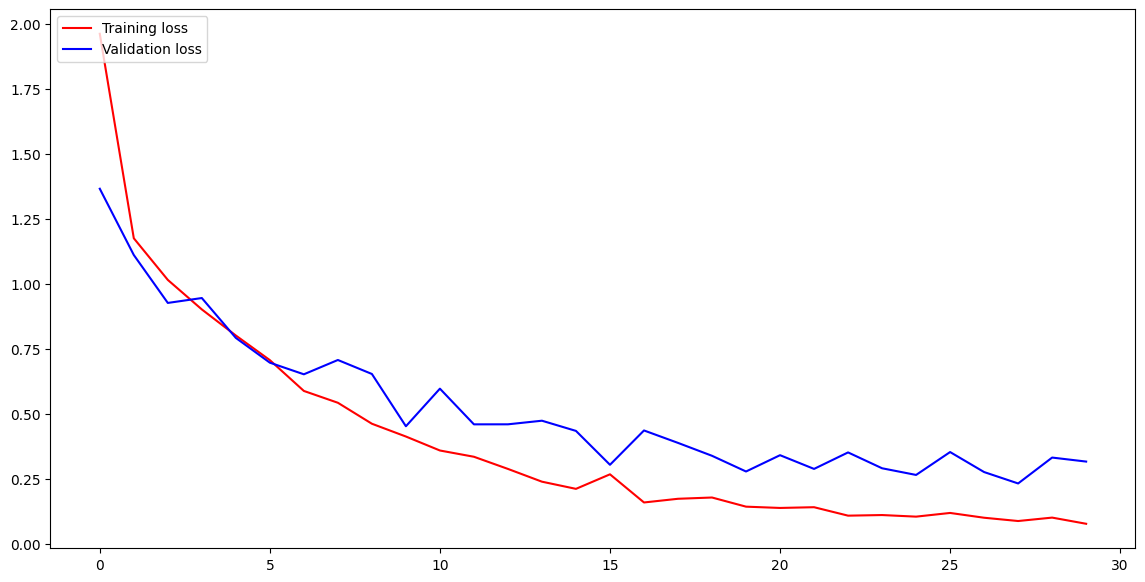

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

Prediction

In [15]:
img = cv2.imread(r'archive\Testing\no_tumor\image(92).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [16]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

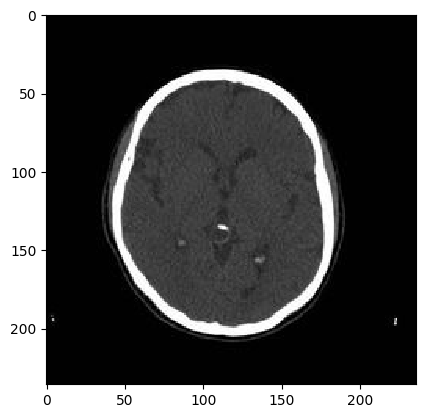

In [17]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r'archive\Testing\no_tumor\image(92).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [18]:
a=model.predict(img_array)
indices = a.argmax()
if indices == 0:
    predicted_label = 'glioma_tumor'
elif indices == 1:
    predicted_label = 'meningioma_tumor'
elif indices == 2:
    predicted_label = 'no_tumor'
elif indices == 3:
    predicted_label = 'pituitary_tumor'
else:
    predicted_label = 'Unknown'
print("Predicted label:", predicted_label)


1/1 [==============================] - 0s 346ms/step
Predicted label: no_tumor
